# **Упражнение 1.2**

In [72]:
import os

if not os.path.exists('thinkdsp.py'):
    %wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

Загрузим с сайта freesound.org образец звука и исследуем его различными способами. При исследовании будем использовать библиотеку thinkdsp. Для начала представим исследуемый образец в виде волны (wave)

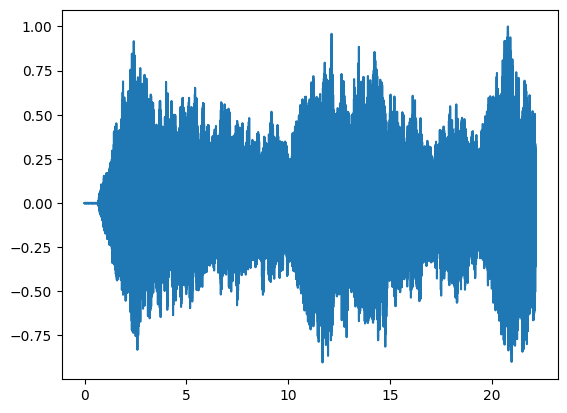

In [73]:
from thinkdsp import read_wave
from IPython.display import Audio
wave = read_wave("ambient.wav")
audio = Audio(data=wave.ys, rate=wave.framerate)
wave.plot()
audio

Далее выделим промежуток длительностью 0.5 секунды – с 10.0 по 10.5 секунду. В дальнейшем будем исследовать его.

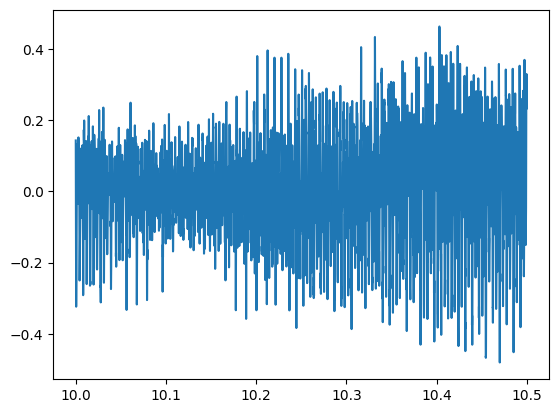

In [74]:
segment = wave.segment(start = 10, duration= 0.5)
audio1 = Audio(data=segment.ys, rate=segment.framerate)
segment.plot()
audio1

Далее получим спектр выбранного фрагмента.

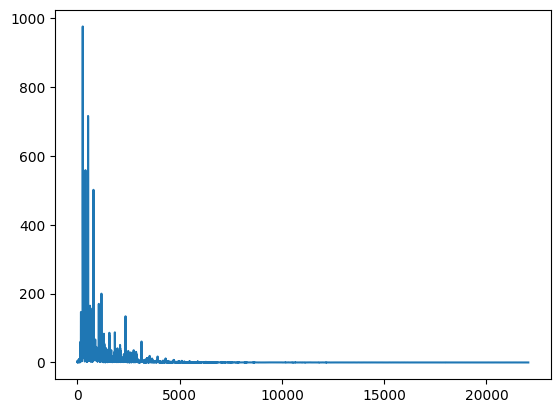

In [75]:
spectrum = segment.make_spectrum()
spectrum.plot()

По рис.выше можно увидеть, что в выбранном сегменте преобладают низкие частоты. 
Ограничим рассматриваемую частоту до 2000 Гц, чтобы посмотреть, какие частоты являются доминирующими в данном фрагменте. 


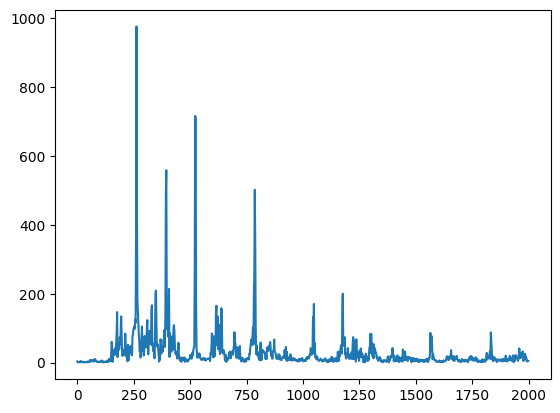

In [76]:
spectrum.plot(high=2000)

Видим, что самое большое число находится на отметке 260 Гц. Это означает, что в данном сигнале есть постоянная составляющая.
Далее получим список пиковых частот.


In [77]:
spectrum.peaks()[:5]

[(976.4615945809169, 262.0),
 (716.4008217345407, 522.0),
 (708.1296400544371, 524.0),
 (558.9002633358311, 394.0),
 (501.7457779263135, 786.0)]

Далее отбросим высокие частоты (более 5000 Гц)и послушаем, что получилось

In [78]:
spectrum.low_pass(5000)
spectrum.make_wave().make_audio()

Звук стал ниже. Теперь отбросим низкие частоты (ниже 1500 Гц) и послушаем, что получилось

In [79]:
spectrum.high_pass(1500)
spectrum.make_wave().make_audio()

Звук стал выше. Теперь, используя band_stop, отбросим все частоты вне диапазона 500Гц - 2000Гц

In [80]:
spectrum.band_stop(500,2000)
spectrum.make_wave().make_audio()

# **Упражнение 1.3**

Создадим обьекты SinSignal и CosSignal, далее просуммируем их. Получили следующий
"сложный" сигнал:

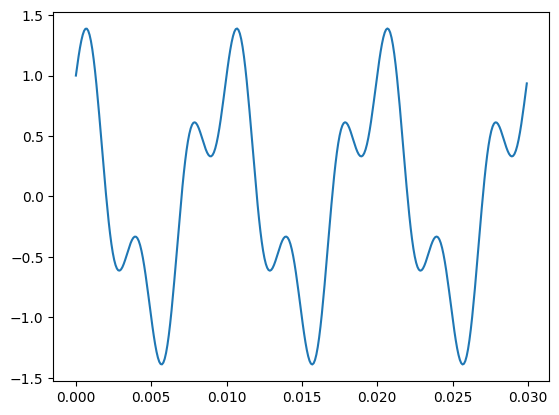

In [81]:
from thinkdsp import CosSignal, SinSignal

cos_sig = CosSignal(freq=100, amp=1.0, offset=0)
sin_sig = SinSignal(freq=300, amp=0.5, offset=0)
mix = sin_sig + cos_sig
mix.plot()
wave2 = mix.make_wave()
audio2 = Audio(data=wave2.ys, rate=wave2.framerate)
audio2

Вычислим спектр данного сигнала и распечатаем его

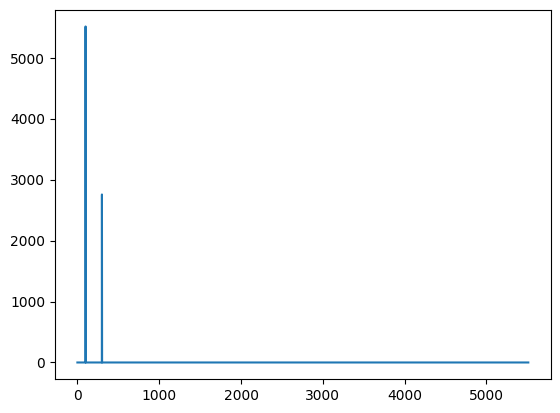

In [82]:
spectrum2 = mix.make_wave().make_spectrum()
spectrum2.plot()

Если добавить сигнал, не кратный 100, то мы услышим его как выделяющийся звук

In [83]:
mix += SinSignal(freq=450)
mix.make_wave().make_audio()

# **Упражнение 1.4**

Создадим функцию stretch, которая ускоряет (или замедляет) аудиозапись

In [84]:
def stretch(wave, factor):
    wave.ts *= factor
    wave.framerate /= factor

Протестируем ее. Аудиозапись уменьшилась в 2 раза

In [85]:
stretch(wave, 0.5)
wave.make_audio()

В данном случае мы изменяем ts - массив моментов выборки и преобразования сигнала, умножая его на 0.5, мы уменьшаем длительность аудиозаписи, а увеличивая частоту фреймов (делением на 0.5 мы умножаем на 2), мы ускоряем запись 